In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans, k_means
import numpy as np
#Context

#The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

#Attribute information

#Invoice id: Computer generated sales slip invoice identification number

#Branch: Branch of supercenter (3 branches are available identified by A, B and C).

#City: Location of supercenters

#Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

#Gender: Gender type of customer

#Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

#Unit price: Price of each product in $

#Quantity: Number of products purchased by customer

#Tax: 5% tax fee for customer buying

#Total: Total price including tax

#Date: Date of purchase (Record available from January 2019 to March 2019)

#Time: Purchase time (10am to 9pm)

#Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

#COGS: Cost of goods sold

#Gross margin percentage: Gross margin percentage

#Gross income: Gross income

#Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

#Acknowledgements

#Thanks to all who take time and energy to perform Kernels with this dataset and reviewers.

#Purpose

#This dataset can be used for predictive data analytics purpose.

In [ ]:
supermarket_data = pd.read_csv('/content/drive/MyDrive/BCA Dataset/supermarket_data.csv')
supermarket_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Seperating Data by branch
branch_A = supermarket_data[supermarket_data['Branch']== 'A']
branch_B = supermarket_data[supermarket_data['Branch']== 'B']
branch_C = supermarket_data[supermarket_data['Branch']== 'C']

In [ ]:
#functions to draw graphs
def scatter_relplot(x_val,y_val,hue,title,xlab,ylab,size,order):
  sns.set_style('darkgrid')
  sns.set_context('notebook')
  line =sns.relplot(x = x_val, y =y_val , data = supermarket_data ,
                  hue = hue,kind='scatter',size=size, hue_order= order)
  line.fig.suptitle(title, y = 1.2)
  line.set(xlabel = xlab,
           ylabel = ylab)
  plt.show()

def box_catplot(x_val,y_val,col,row,xlab,ylab,title, whis, order): 
  sns.set_style('darkgrid')
  sns.set_context('notebook')
  g =sns.catplot(x = x_val, y =y_val , data = supermarket_data ,
                  col=col,row=row,kind='box',whis = whis , order = order)
  g.fig.suptitle(title, y = 1.2)
  g.set(xlabel = xlab,
           ylabel = ylab)
  plt.show()

def count_catplot(x_val,col,row,xlab,ylab,title):
   sns.set_context('notebook') 
   sns.set_style('darkgrid')
   sns.set_palette('Set2')
   g = sns.catplot(x=x_val, data= supermarket_data , kind= 'count'
                          , col = col, row=row)
   g.fig.suptitle(title, y= 1.1)
   g.set(xlabel = xlab  
                 , ylabel = ylab)
   plt.show()

def point_catplot(x_val,y_val,hue,xlab,ylab,title,ci,join, order): 
   sns.set_context('notebook') 
   sns.set_style('darkgrid')
   g = sns.catplot(x=x_val, y=y_val,data= supermarket_data , kind= 'point'
                  , hue=hue, ci = ci, join=join,order = order)
   g.fig.suptitle(title, y= 1.1)
   g.set(xlabel = xlab  
                 , ylabel = ylab)
   plt.show()

def bar_catplot(x_val,y_val,hue,title,xlab,ylab,ci,order):
   sns.set_context('notebook') 
   sns.set_style('darkgrid')
   g = sns.catplot(x=x_val, y=y_val,hue=hue,data= supermarket_data , kind= 'bar',
                  ci = ci,order = order)
   g.fig.suptitle(title, y= 1.1)
   g.set(xlabel = xlab  
                 , ylabel = ylab)
   plt.show()
    
def point_rot_catplot(x_val,y_val,hue,join,estimator,ci): 
   sns.set_context('notebook') 
   sns.set_style('darkgrid')
   g = sns.catplot(x=x_val, data= supermarket_data , kind= 'point'
                  , hue=hue, join = join,estimator=estimator,ci = ci)
   g.fig.suptitle(title, y= 1.1)
   g.set(xlabel = xlab  
                 , ylabel = ylab)
   plt.xticks(rotation = 90)
   plt.show()

def count_rot_catplot(x_val,col,row,xlab,ylab,title):
   sns.set_context('notebook') 
   sns.set_style('darkgrid')
   sns.set_palette('Set2')
   product_g = sns.catplot(x=x_val, data= supermarket_data , kind= 'count'
                          , col = col, row=row)
   product_g.fig.suptitle(title, y= 1.1)
   product_g.set(xlabel = xlab  
                 , ylabel = ylab)
   plt.show()

def scatterrotrelplot(x_val,y_val,hue,title,xlab,ylab,size):
  sns.set_style('darkgrid')
  sns.set_context('notebook')
  line =sns.relplot(x = x_val, y =y_val , data = supermarket_data ,
                  hue = hue ,kind='scatter',size = size)
  line.fig.suptitle('title', y = 1.2)
  line.set(xlabel = xlab,
           ylabel = ylab)
  plt.xticks(rotation = 90)
  plt.show()

def box_rot_catplot(x_val,y_val,col,row,title,xlab,ylab):
  sns.set_style('darkgrid')
  sns.set_context('notebook')
  g =sns.catplot(x = x_val, y =y_val , data = supermarket_data ,
                  col=col,row=row,kind='box')
  g.fig.suptitle(title, y = 1.1)
  g.set(xlabel = xlab,
           ylabel = ylab)
  g.set_xticklabels(rotation = 90)
  plt.show()

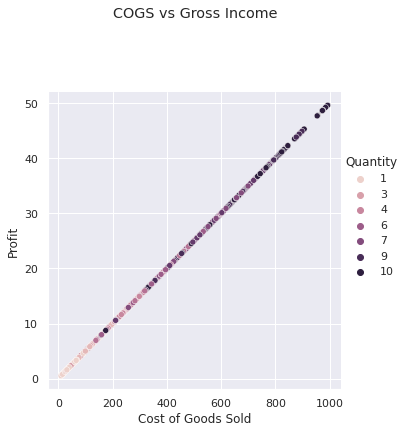

In [ ]:
# scatter plot of gross income and cogs 
scatter_relplot('cogs','gross income','Quantity','COGS vs Gross Income', 'Cost of Goods Sold', 'Profit',None,None)

In [ ]:
print(supermarket_data.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


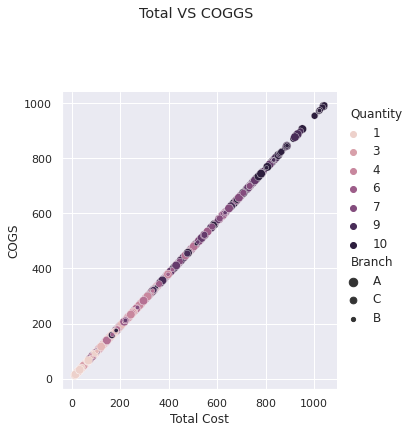

In [ ]:
scatter_relplot('Total','cogs','Quantity','Total VS COGGS', 'Total Cost','COGS','Branch', None)

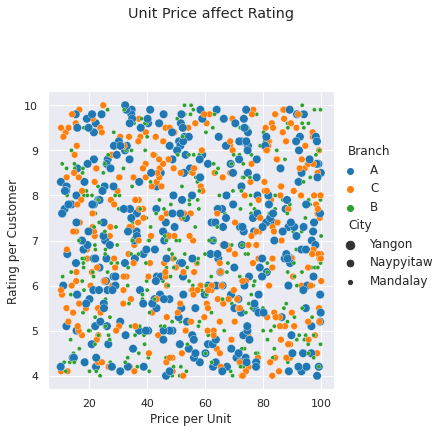

In [ ]:
scatter_relplot('Unit price','Rating','Branch','Unit Price affect Rating', 'Price per Unit','Rating per Customer','City', None)

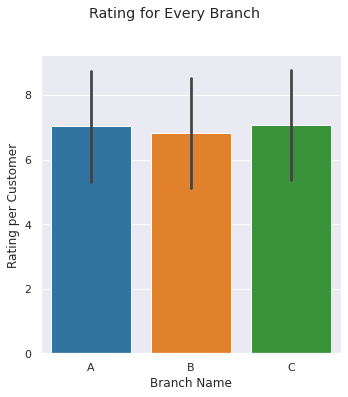

In [ ]:
bar_catplot('Branch','Rating',None,'Rating for Every Branch', 'Branch Name', 'Rating per Customer','sd',['A','B','C'])

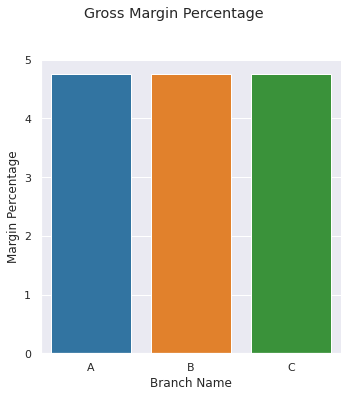

In [ ]:
bar_catplot('Branch','gross margin percentage',None,'Gross Margin Percentage', 'Branch Name', 'Margin Percentage','sd',['A','B','C'])

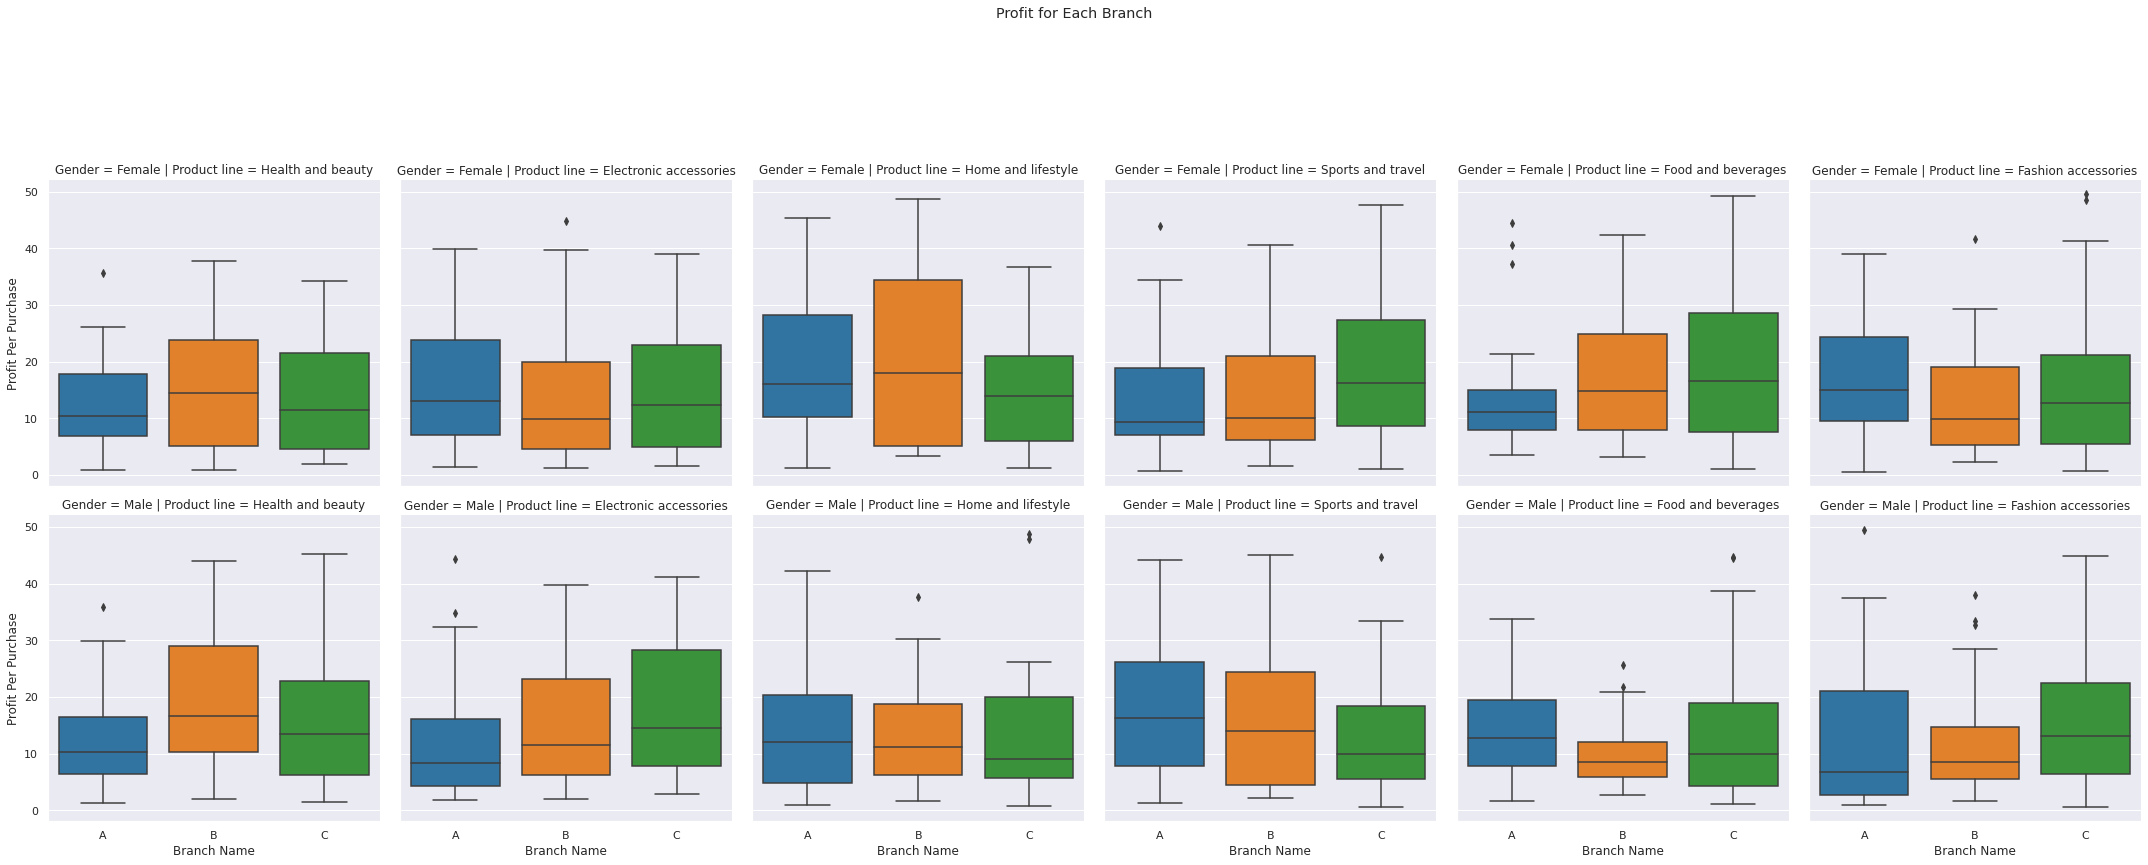

In [ ]:
box_catplot('Branch','gross income','Product line','Gender','Branch Name','Profit Per Purchase','Profit for Each Branch', 1.5 ,['A','B','C'])

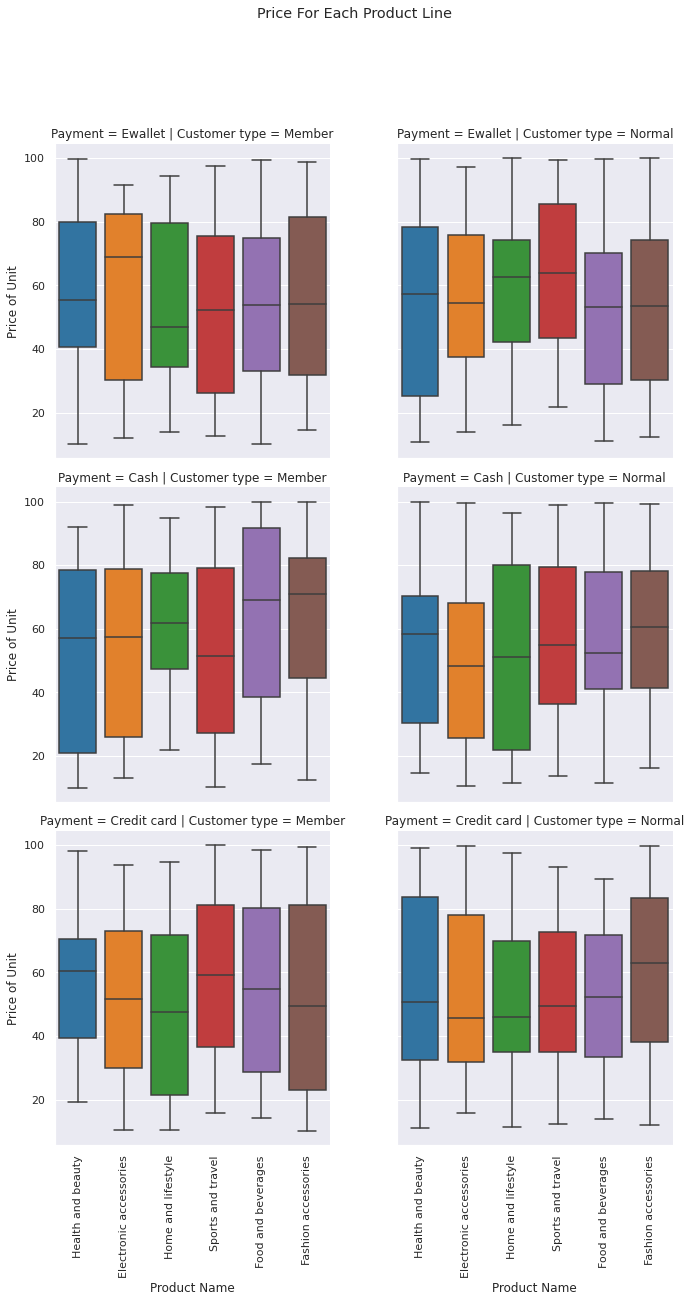

In [ ]:
box_rot_catplot('Product line','Unit price','Customer type','Payment','Price For Each Product Line', 'Product Name','Price of Unit')

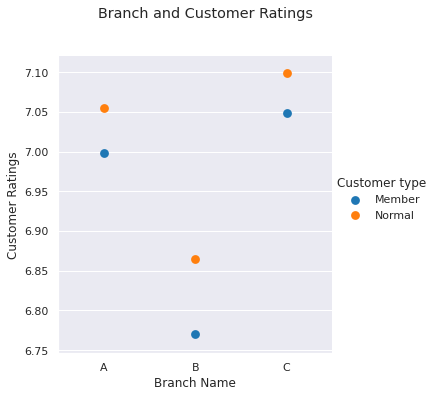

In [ ]:
point_catplot('Branch','Rating','Customer type','Branch Name','Customer Ratings','Branch and Customer Ratings',0,False,['A','B','C'])

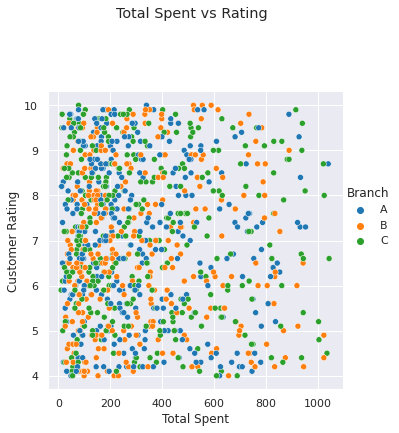

In [ ]:
scatter_relplot('Total','Rating','Branch','Total Spent vs Rating','Total Spent','Customer Rating',None,['A','B','C'])

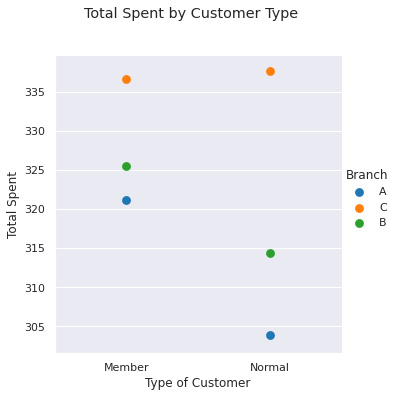

In [ ]:
point_catplot('Customer type','Total','Branch','Type of Customer','Total Spent','Total Spent by Customer Type',0,False,['Member','Normal'])

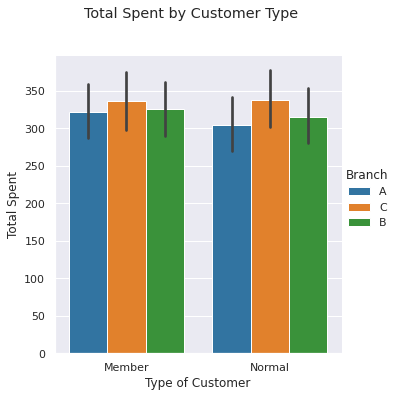

In [ ]:
bar_catplot('Customer type','Total','Branch','Total Spent by Customer Type','Type of Customer','Total Spent',95,['Member','Normal'])

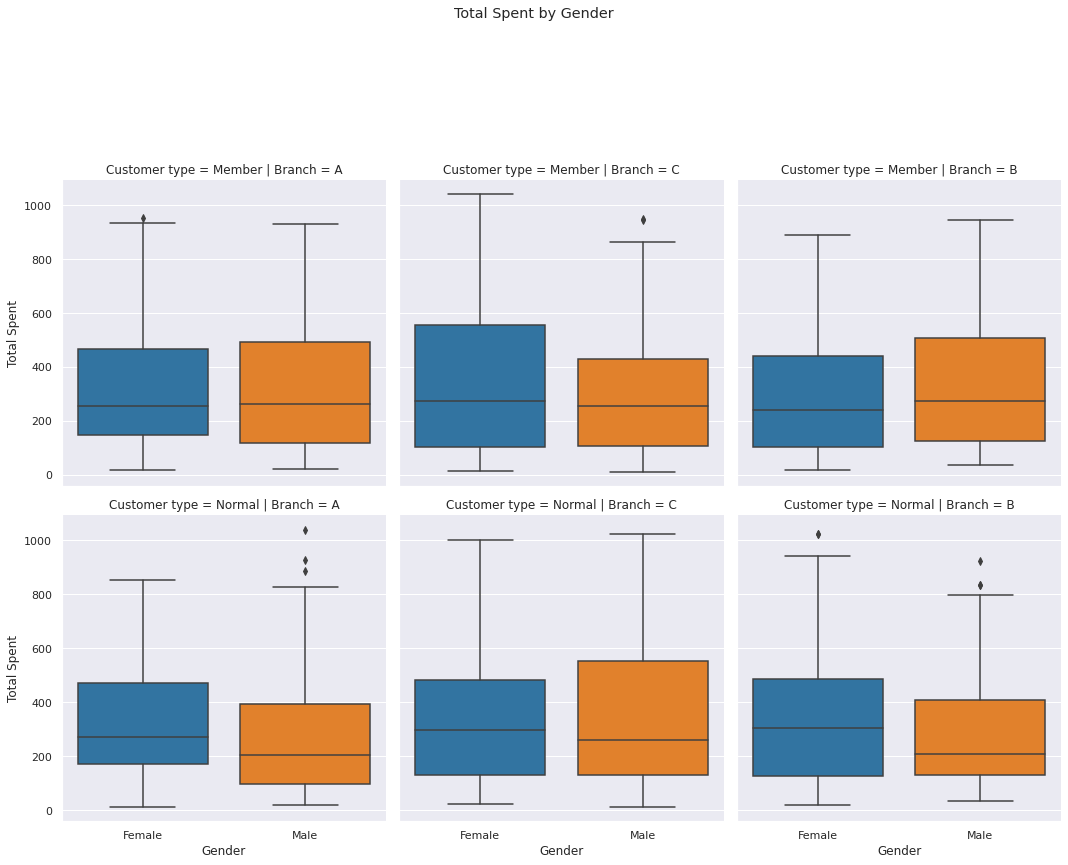

In [ ]:
box_catplot('Gender','Total','Branch','Customer type','Gender','Total Spent','Total Spent by Gender',1.5,['Female','Male'])

In [ ]:
supermarket_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
supermarket_data.shape

(1000, 17)

In [ ]:
for column in supermarket_data:
  unique_vals = np.unique(supermarket_data[column])
  n_vals = len(unique_vals)
  if n_vals < 10 :
    print('The number of values for feature {} : {} is {}'.format(column,n_vals,unique_vals))
  else: 
    print('The number of values for feature {} = {}'.format(column,n_vals))
  

The number of values for feature Invoice ID = 1000
The number of values for feature Branch : 3 is ['A' 'B' 'C']
The number of values for feature City : 3 is ['Mandalay' 'Naypyitaw' 'Yangon']
The number of values for feature Customer type : 2 is ['Member' 'Normal']
The number of values for feature Gender : 2 is ['Female' 'Male']
The number of values for feature Product line : 6 is ['Electronic accessories' 'Fashion accessories' 'Food and beverages'
 'Health and beauty' 'Home and lifestyle' 'Sports and travel']
The number of values for feature Unit price = 943
The number of values for feature Quantity = 10
The number of values for feature Tax 5% = 990
The number of values for feature Total = 990
The number of values for feature Date = 89
The number of values for feature Time = 506
The number of values for feature Payment : 3 is ['Cash' 'Credit card' 'Ewallet']
The number of values for feature cogs = 990
The number of values for feature gross margin percentage : 1 is [4.76190476]
The numb

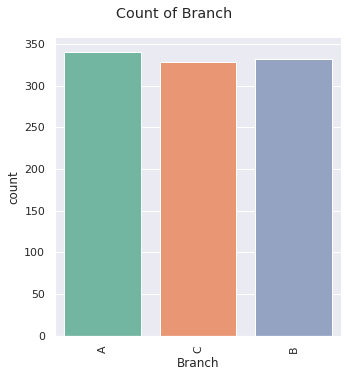

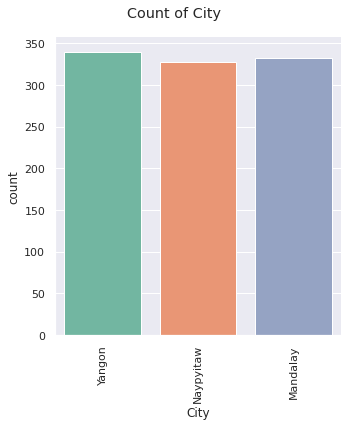

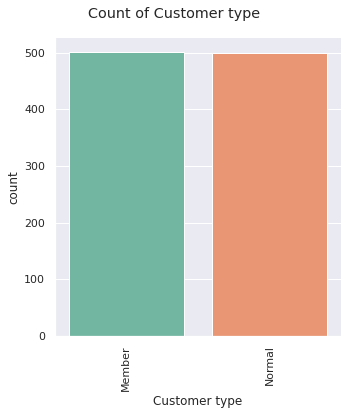

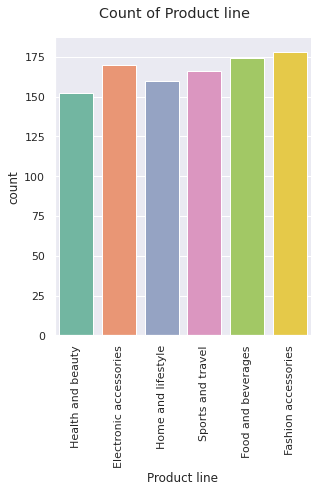

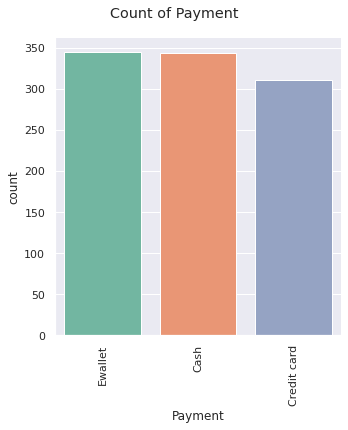

In [ ]:
cols = ['Branch','City','Customer type','Product line','Payment']
for i in cols:
  sns.set_context('notebook')
  sns.set_style('darkgrid')
  g = sns.catplot(x= i, data = supermarket_data, palette='Set2', kind= 'count')
  plt.xticks(rotation=90)
  g.fig.suptitle('Count of {}'.format(i),y =1.05)
  plt.show()

In [ ]:
# Feature engineering to change categorical variables into numeric representations
features = [ 'Customer type', 'Gender','Product line',
       'Payment']
customer_data = supermarket_data[features]
new_customer_data = pd.get_dummies(customer_data, columns=features)
print(new_customer_data.shape)
print(new_customer_data.head())
print(new_customer_data.tail())

(1000, 13)
   Customer type_Member  ...  Payment_Ewallet
0                     1  ...                1
1                     0  ...                0
2                     0  ...                0
3                     1  ...                1
4                     0  ...                1

[5 rows x 13 columns]
     Customer type_Member  ...  Payment_Ewallet
995                     0  ...                1
996                     0  ...                1
997                     1  ...                0
998                     0  ...                0
999                     1  ...                0

[5 rows x 13 columns]


In [ ]:
'Unit price', 'Quantity', 'Total', 'Rating'
new_customer_data['Unit price'] = supermarket_data['Unit price']
new_customer_data['Quantity'] = supermarket_data['Quantity']
new_customer_data['Total Spent'] = supermarket_data['Total']
new_customer_data['Ratings'] =  supermarket_data['Rating']

In [ ]:
print(new_customer_data.head())

   Customer type_Member  Customer type_Normal  ...  Total Spent  Ratings
0                     1                     0  ...     548.9715      9.1
1                     0                     1  ...      80.2200      9.6
2                     0                     1  ...     340.5255      7.4
3                     1                     0  ...     489.0480      8.4
4                     0                     1  ...     634.3785      5.3

[5 rows x 17 columns]


In [ ]:
# Creating a multidimensional array from dataframe columns
x_train = new_customer_data.values

# Running the kemans algorithm
kmeans = KMeans(n_clusters= 5 , random_state=540)
kmeans = kmeans.fit(x_train)
print('The clusters are: ' , kmeans.labels_)
print('The inertia is: ', kmeans.inertia_)

The clusters are:  [1 0 2 2 1 1 2 4 0 3 0 0 3 2 4 1 1 2 3 0 2 3 0 3 3 2 0 3 2 3 2 4 1 3 2 0 2
 1 2 3 0 0 2 4 0 2 1 3 0 4 1 3 0 0 0 4 0 4 4 3 0 2 1 3 2 3 0 1 4 0 4 1 0 2
 1 2 2 3 4 0 1 3 3 2 3 1 2 2 0 2 3 2 3 1 0 0 4 0 3 1 0 4 3 2 3 4 3 2 2 4 0
 3 1 1 4 0 0 0 0 0 4 2 4 1 2 1 3 3 1 4 3 1 0 1 1 3 0 3 1 1 4 4 4 0 2 3 2 3
 1 3 2 3 4 0 1 2 0 3 4 1 2 0 2 3 2 2 4 4 2 1 2 2 3 2 3 2 3 3 2 3 2 2 3 3 0
 0 4 3 0 3 3 0 4 0 3 0 0 0 3 2 0 3 2 3 0 3 1 3 0 4 3 4 2 0 3 0 0 3 4 3 3 2
 0 0 0 3 1 0 1 1 3 0 4 3 1 3 0 3 0 0 3 0 3 3 4 2 3 0 2 1 2 2 0 0 2 0 0 3 0
 3 1 0 3 3 0 4 0 4 3 2 2 0 3 0 1 2 3 2 4 2 1 0 0 1 3 2 0 3 2 1 2 3 0 0 3 3
 0 2 3 0 3 0 0 3 0 1 3 4 0 3 1 0 0 0 4 3 0 2 3 3 3 0 0 2 0 2 1 2 3 0 3 0 2
 0 0 0 4 2 0 2 0 2 1 1 0 4 0 4 3 0 4 2 2 3 0 2 2 4 0 0 1 4 3 2 3 2 2 3 0 3
 3 0 2 3 2 1 2 1 2 0 2 0 1 2 3 0 3 2 1 0 3 2 0 1 0 2 3 0 3 3 3 3 0 3 4 3 0
 3 3 0 2 0 0 0 2 0 3 0 0 3 0 3 4 3 0 2 2 0 2 4 0 0 0 1 0 4 2 3 0 2 0 4 4 0
 0 0 3 0 0 0 2 0 2 0 0 0 4 4 2 0 3 4 3 0 3 1 3 3 0 0 1 3 2 1 2 3 3 2 2 0 1
 2 3 1

In [ ]:
kmeans.labels_.shape

(1000,)

In [ ]:
n_cluster = range(2,20)
inertia = []

for f in n_cluster:
  kmeans = KMeans(n_clusters=f, random_state=2)
  kmeans = kmeans.fit(x_train)
  u = kmeans.inertia_
  inertia.append(u)
  print('Inertia for ', f ,'Cluster is ',u)

Inertia for  2 Cluster is  16828278.162999444
Inertia for  3 Cluster is  7823363.952598602
Inertia for  4 Cluster is  4714745.984878324
Inertia for  5 Cluster is  3330959.3078359915
Inertia for  6 Cluster is  2388892.830783389
Inertia for  7 Cluster is  1839870.4049319685
Inertia for  8 Cluster is  1537543.6303616487
Inertia for  9 Cluster is  1328613.8748840806
Inertia for  10 Cluster is  1144421.8722404847
Inertia for  11 Cluster is  1008245.7053531497
Inertia for  12 Cluster is  893039.5827605966
Inertia for  13 Cluster is  782750.2887051067
Inertia for  14 Cluster is  710564.4814644796
Inertia for  15 Cluster is  641131.4415467412
Inertia for  16 Cluster is  589297.2594940178
Inertia for  17 Cluster is  542958.409230646
Inertia for  18 Cluster is  516080.73434121156
Inertia for  19 Cluster is  467641.0986913151


Text(0.5, 0.98, 'Elbow Method')

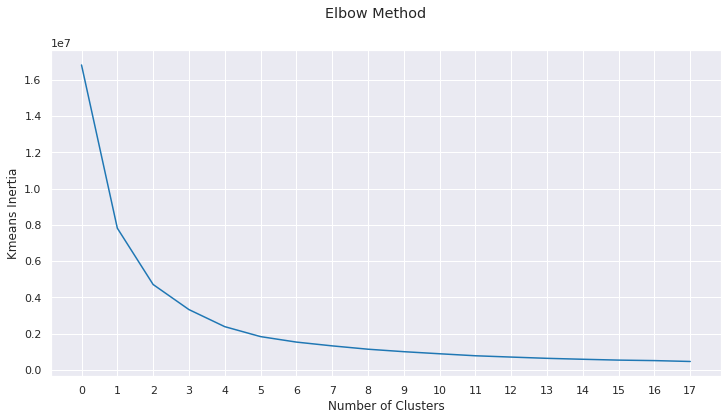

In [ ]:
#Plotting the Elbow method graph
x_elbow =np.arange(int(len( n_cluster)))
fig, ax = plt.subplots(1, figsize= (12,6))
ax.plot(x_elbow,inertia)
ax.set(xlabel = 'Number of Clusters',
       ylabel = 'Kmeans Inertia')
ax.set_xticks(x_elbow)
fig.suptitle('Elbow Method')

In [ ]:
# Runnning K means on 5 clusters
kmeans = KMeans(n_clusters=5,random_state=2)
kmeans = kmeans.fit(x_train)

# Predictions for new data 
predictions = kmeans.predict(x_train)
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# creating a data frame
count_clus = pd.DataFrame(counts, columns = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

# displaying data frame
print(count_clus)

   Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
0        325        126        267        101        181


Explained variance ratio(First Two Components) [0.99300936 0.00687615]


<Figure size 432x288 with 0 Axes>

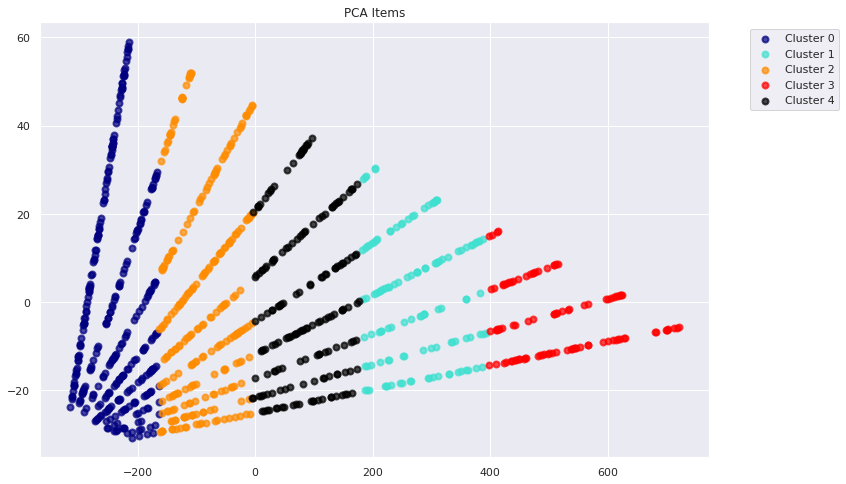

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

x = x_train
y_num = predictions

target_names = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4']

pca = PCA(n_components=2, random_state =453)
x_r = pca.fit(x).transform(x)

print('Explained variance ratio(First Two Components) %s' % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw =2

for color, i , target_name in zip(colors,[0,1,2,3,4],target_names):
  plt.scatter(x_r[y_num == i,0], x_r[y_num ==i,1], color =color, alpha=.7,
              lw =lw, label = target_name)
plt.legend(loc = 'best', shadow = False, scatterpoints=1)
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad= 0.6)
plt.title('PCA Items')
plt.show()


Total variance of dataset is:  61175.56460898163
95% CI is  58116.786378532546
Variance explain with 1 n_components:  60747.907991742315
Variance explain with 30 n_components:  61175.56460898163
Variance explain with 40 n_components:  61175.56460898163
Variance explain with 50 n_components:  61175.56460898163


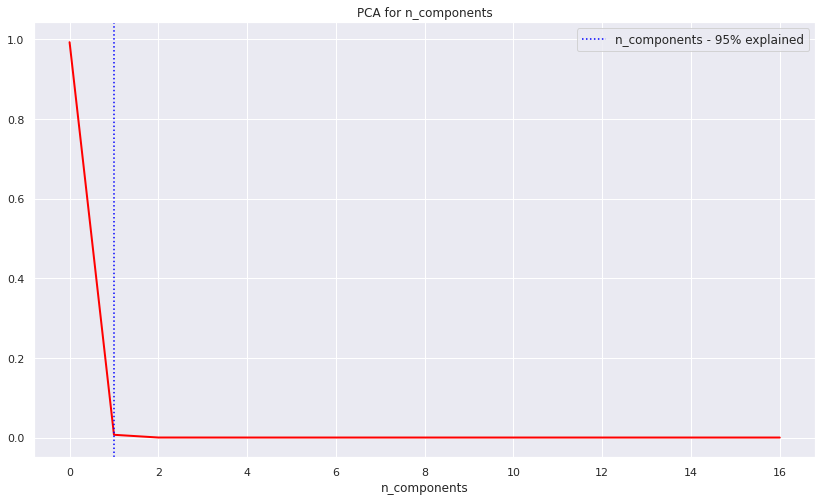

In [ ]:
# trying to get dimensionality reduction
n_comp = x.shape[1]

#Running PCA with all components
pca = PCA(n_components=n_comp, random_state=453)
x_r = pca.fit(x).transform(x)

# cal total variance and 95% var
total_variance = sum(pca.explained_variance_)
print('Total variance of dataset is: ', total_variance)
var_95 = total_variance * 0.95
print('95% CI is ', var_95)

# creating a df with the components
a = zip(range(0,n_comp), pca.explained_variance_)
a = pd.DataFrame(a, columns= ['PCA Comp', 'Explained Variance'])

# To hit 95% 
print('Variance explain with 1 n_components: ', sum(a['Explained Variance'][0:1]))
print('Variance explain with 30 n_components: ', sum(a['Explained Variance'][0:30]))
print('Variance explain with 40 n_components: ', sum(a['Explained Variance'][0:40]))
print('Variance explain with 50 n_components: ', sum(a['Explained Variance'][0:50]))

# Plotting the data 
plt.figure(1, figsize=(14,8))
plt.plot(pca.explained_variance_ratio_, linewidth=2,c ='r')
plt.xlabel('n_components')
plt.axvline(1,linestyle=':', label = 'n_components - 95% explained', c='blue')
plt.legend(prop= dict(size =12))
plt.title('PCA for n_components')
plt.show()



Inertia for  2 Cluster is  16401235.957548212
Inertia for  3 Cluster is  7398840.677805975
Inertia for  4 Cluster is  4292053.903600663
Inertia for  5 Cluster is  2907129.0655694865
Inertia for  6 Cluster is  1968544.6694927611
Inertia for  7 Cluster is  1417983.4590749145
Inertia for  8 Cluster is  1117921.4658612462
Inertia for  9 Cluster is  910943.6462324304
Inertia for  10 Cluster is  731463.3647806859
Inertia for  11 Cluster is  590116.5807738056
Inertia for  12 Cluster is  477735.9008783783
Inertia for  13 Cluster is  406123.8139664737
Inertia for  14 Cluster is  354052.3995750875
Inertia for  15 Cluster is  307300.3276768124
Inertia for  16 Cluster is  263463.29913260083
Inertia for  17 Cluster is  231832.4952668902
Inertia for  18 Cluster is  207416.60245417067
Inertia for  19 Cluster is  182891.09204425296


Text(0.5, 0.98, 'Elbow Method')

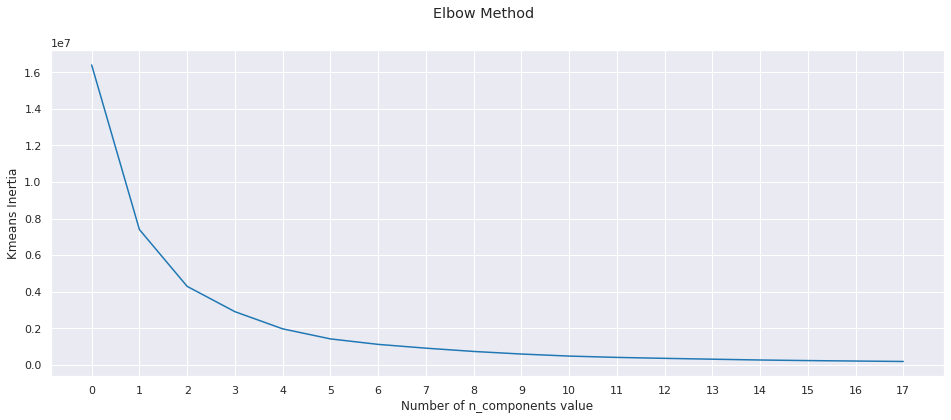

In [ ]:
pca = PCA(n_components= 1, random_state= 453)
x_r = pca.fit(x).transform(x)

inertia = []

for f in n_cluster:
  kmeans = KMeans(n_clusters=f, random_state=2)
  kmeans = kmeans.fit(x_r)
  u = kmeans.inertia_
  inertia.append(u)
  print('Inertia for ', f ,'Cluster is ',u)

x_elbow =np.arange(int(len( n_cluster)))
fig, ax = plt.subplots(1, figsize= (16,6))
ax.plot(x_elbow,inertia)
ax.set(xlabel = 'Number of n_components value',
       ylabel = 'Kmeans Inertia')
ax.set_xticks(x_elbow)
fig.suptitle('Elbow Method')

In [ ]:
# Final step attach clusters to cluster names and rerun Kmeans algo
pca = PCA(n_components= 1, random_state= 453)
x_r = pca.fit(x).transform(x)

# running Kmeans with 4 ks 
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(x_r)

clusters = kmeans.labels_

# attaching cluster to dataset
new_customer_data['Clusters'] = clusters

# Creating a cluster Category 
new_customer_data['Cluster Category'] = 'No Data'
new_customer_data['Cluster Category'].loc[new_customer_data['Clusters'] == 0] = 'Cluster 1'
new_customer_data['Cluster Category'].loc[new_customer_data['Clusters'] == 1] = 'Cluster 2'
new_customer_data['Cluster Category'].loc[new_customer_data['Clusters'] == 2] = 'Cluster 3'
new_customer_data['Cluster Category'].loc[new_customer_data['Clusters'] == 3] = 'Cluster 4'

new_customer_data.head(15)

supermarket_data['Clusters'] = clusters
supermarket_data['Cluster Category'] = 'No Data'
supermarket_data['Cluster Category'].loc[supermarket_data['Clusters'] == 0] = 'Cluster 1'
supermarket_data['Cluster Category'].loc[supermarket_data['Clusters'] == 1] = 'Cluster 2'
supermarket_data['Cluster Category'].loc[supermarket_data['Clusters'] == 2] = 'Cluster 3'
supermarket_data['Cluster Category'].loc[supermarket_data['Clusters'] == 3] = 'Cluster 4'

supermarket_data.head(15)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Clusters,Cluster Category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,0,Cluster 1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,1,Cluster 2
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,Cluster 4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0,Cluster 1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,0,Cluster 1
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,0,Cluster 1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,0,Cluster 1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,2,Cluster 3
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,1,Cluster 2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9,1,Cluster 2


In [ ]:
df = supermarket_data[['Customer type','Gender','Product line','Payment','Clusters']]
print(df)

    Customer type  Gender            Product line      Payment  Clusters
0          Member  Female       Health and beauty      Ewallet         0
1          Normal  Female  Electronic accessories         Cash         1
2          Normal    Male      Home and lifestyle  Credit card         3
3          Member    Male       Health and beauty      Ewallet         0
4          Normal    Male       Sports and travel      Ewallet         0
..            ...     ...                     ...          ...       ...
995        Normal    Male       Health and beauty      Ewallet         1
996        Normal  Female      Home and lifestyle      Ewallet         2
997        Member    Male      Food and beverages         Cash         1
998        Normal    Male      Home and lifestyle         Cash         1
999        Member  Female     Fashion accessories         Cash         0

[1000 rows x 5 columns]


In [ ]:
c0 = df[df['Clusters'] == 0]
c1 = df[df['Clusters'] == 1]
c2 = df[df['Clusters'] == 2]
c3 = df[df['Clusters'] == 3]

In [ ]:
m0 =c0.mode()
l0=len(c0)

In [ ]:
m1=c1.mode()
l1= len(c1)

In [ ]:
m2 = c2.mode()
l2 = len(c2)

In [ ]:
m3= c3.mode()
l3 = len(c3)

In [ ]:
mode = [m0,m1,m2,m3]
length = [l0,l1,l2,l3]
summary =pd.DataFrame()
summary['Mode'] = mode
summary['Length'] = length
summary.drop('Mode', axis =1)

,Length
0,207
1,391
2,128
3,274


In [ ]:
mode = m0.append([m1,m2,m3])

In [ ]:
mode['length'] = length 

In [ ]:
mode.head()

,Customer type,Gender,Product line,Payment,Clusters,length
0,Normal,Female,Fashion accessories,Ewallet,0,207
0,Normal,Male,Fashion accessories,Ewallet,1,391
0,Member,Female,Electronic accessories,Credit card,2,128
0,Normal,Female,Food and beverages,Cash,3,274
